<a href="https://www.kaggle.com/code/abdullahaslamqazi/speech-recognition-model?scriptVersionId=196039354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORT MODULES**


In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


**LOAD DATASET**

In [3]:
paths = []
labels= []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
        break
        
print('Dataset loaded')

Dataset loaded


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_raid_angry.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_gap_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_good_disgust.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_soup_neutral.wav']

In [5]:
labels[:5]

['fear', 'angry', 'fear', 'disgust', 'neutral']

In [6]:
##data frame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,angry
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,disgust
4,/kaggle/input/toronto-emotional-speech-set-tes...,neutral


In [7]:
df['label'].value_counts()


label
fear       4
angry      4
disgust    4
neutral    4
sad        4
ps         4
happy      4
Name: count, dtype: int64

## Data Analysis

<Axes: ylabel='count'>

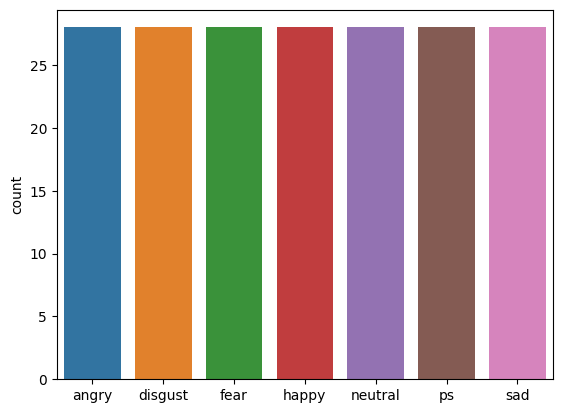

In [8]:
one_hot_encoded = pd.get_dummies(df['label'])
sns.countplot(data=one_hot_encoded)

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20 )
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    
    

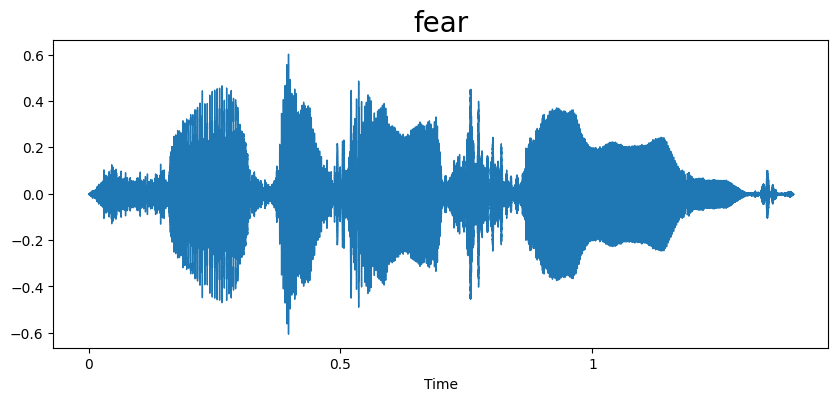

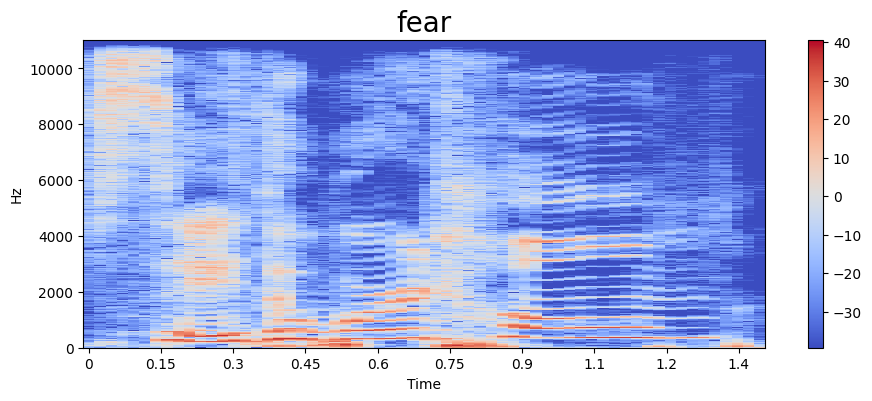

In [10]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

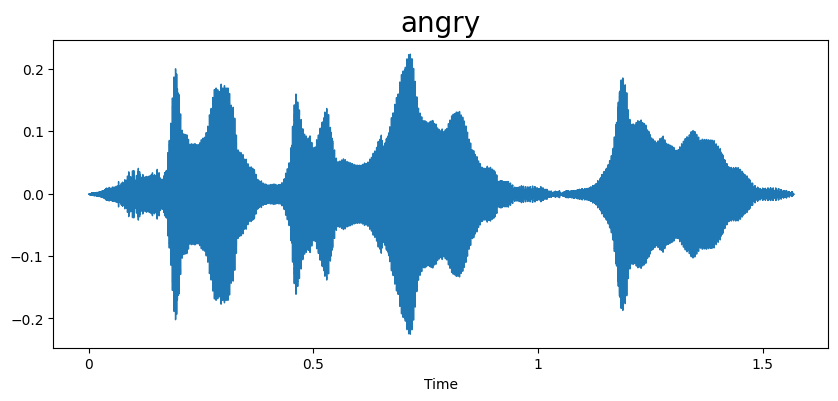

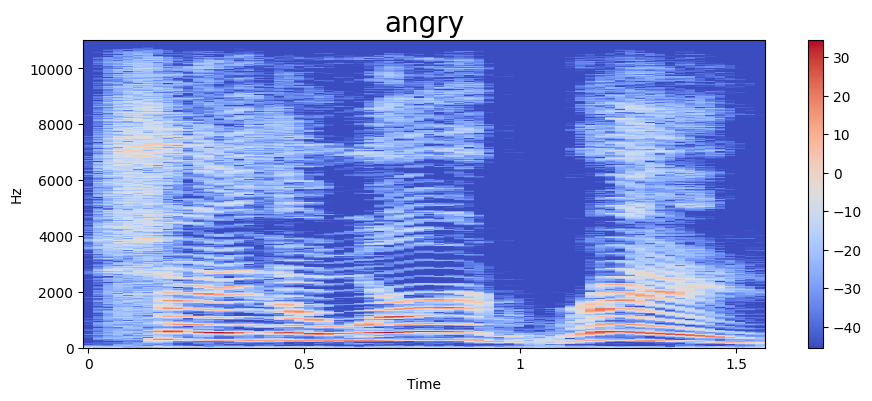

In [11]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

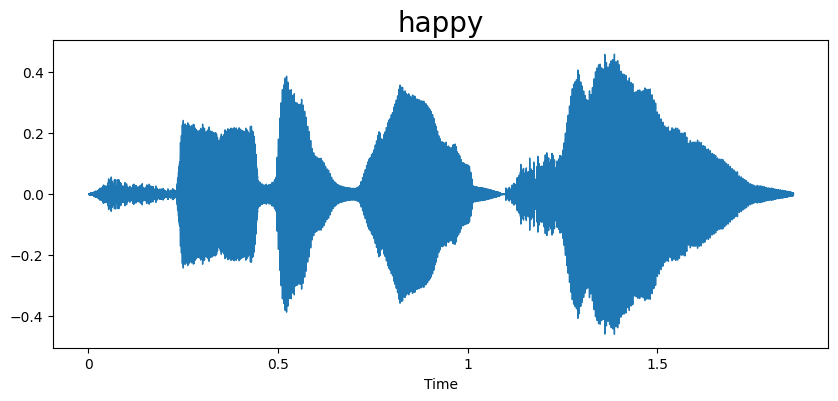

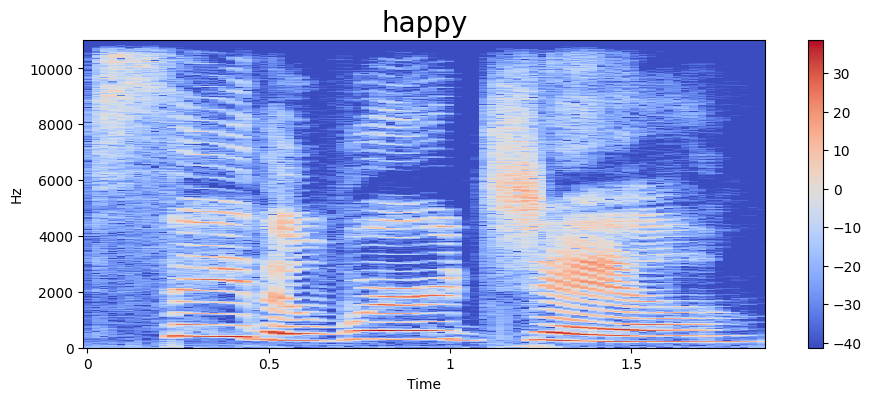

In [12]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

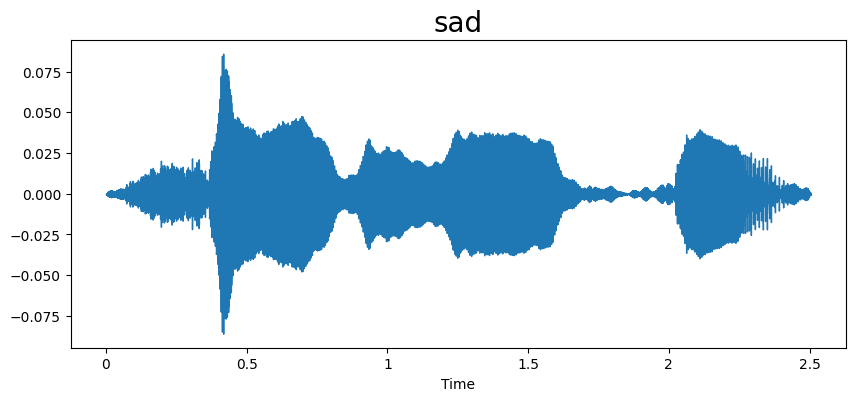

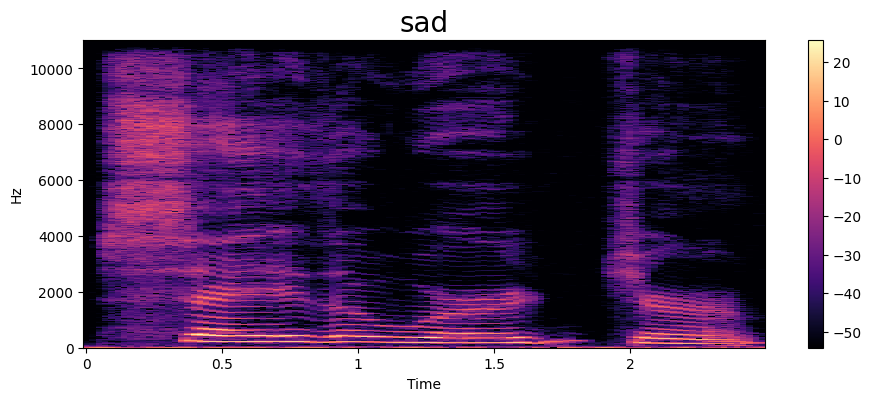

In [13]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Feature Extraction 

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    
    return mfcc
    


In [15]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [16]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))


In [17]:
X_mfcc

0     [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1     [-416.90005, 94.149956, -1.9918422, -20.243567...
2     [-455.01346, 84.29203, -0.09554537, -22.462715...
3     [-418.26794, 102.83896, 19.262575, -3.3078573,...
4     [-525.6185, 72.173584, 30.458906, 2.2819057, 7...
5     [-329.7431, 42.04781, -22.627747, 9.305297, -2...
6     [-545.9006, 103.277054, 28.864674, 12.691002, ...
7     [-424.77625, 117.139915, -9.993388, -0.0497784...
8     [-408.58902, 85.79778, -8.322413, 15.182524, -...
9     [-501.83975, 114.31044, 4.052286, -5.1728487, ...
10    [-302.6353, 56.720577, -23.173166, 19.874756, ...
11    [-421.18323, 102.77897, 19.685741, -22.023285,...
12    [-454.43314, 88.06056, 21.013117, 37.71676, 5....
13    [-377.3896, 81.54513, -25.676172, -17.622137, ...
14    [-285.7373, 85.78295, -2.1689105, 22.125532, -...
15    [-416.90005, 94.149956, -1.9918422, -20.243567...
16    [-455.01346, 84.29203, -0.09554537, -22.462715...
17    [-418.26794, 102.83896, 19.262575, -3.3078

In [18]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(28, 40)

In [19]:
X=np.expand_dims(X,-1)
print(X.dtype)
X.shape

float32


(28, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y =enc.fit_transform(df[['label']])

In [21]:
y = y.toarray()

In [22]:
y.shape


(28, 7)

# LSTM MODEL

In [23]:
from keras.models import Sequential
from keras.layers import Dense ,LSTM, Dropout
model= Sequential([
    LSTM(123,return_sequences=False , input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1364 - loss: 1.9804 - val_accuracy: 0.1667 - val_loss: 1.9728
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3636 - loss: 1.8960 - val_accuracy: 0.1667 - val_loss: 2.0124
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2727 - loss: 1.8303 - val_accuracy: 0.1667 - val_loss: 2.0550
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3636 - loss: 1.8065 - val_accuracy: 0.1667 - val_loss: 2.0785
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4091 - loss: 1.9104 - val_accuracy: 0.1667 - val_loss: 2.0685
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3182 - loss: 1.8047 - val_accuracy: 0.1667 - val_loss: 2.0357
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4091 - loss: 1.7262 - val_accuracy: 0.1667 - val_loss: 2.0173
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4545 - loss: 1.7649 - val_accuracy: 0.1667 - val_loss: 1

# PLOT RESULTS

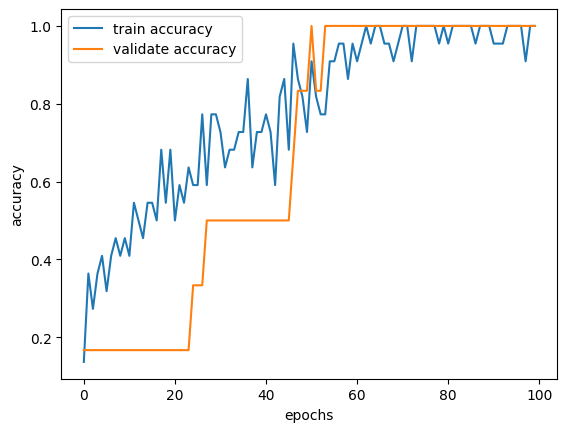

In [25]:
epochs=list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='validate accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


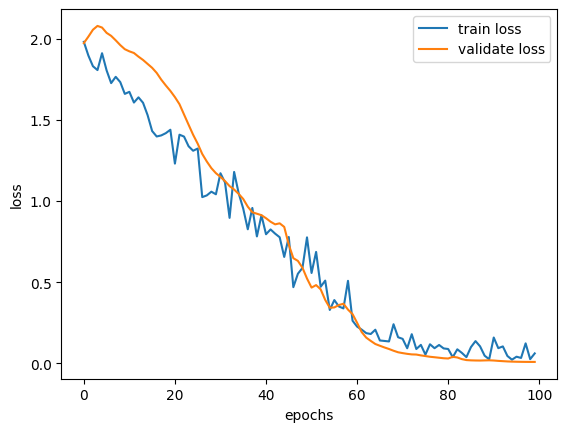

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='validate loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
